In [7]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [11]:
subset = pivot[(pivot["Year"] >= 2010) & (pivot["Year"] <= 2015)]
year_options = sorted(subset["Year"].unique())
dropdown = widgets.Dropdown(options=year_options, description='years:')

def show_table_by_year(year):
    display(subset[subset["Year"] == year].sort_values(by="kcal_per_capita_per_day", ascending=False).head(15))

widgets.interact(show_table_by_year, year=dropdown);

interactive(children=(Dropdown(description='years:', options=(np.int64(2010), np.int64(2011), np.int64(2012), …

In [12]:
available_years = sorted(pivot["Year"].unique())

year_selector = widgets.Dropdown(
    options=available_years,
    description='years:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='250px')
)

def plot_pie_by_year(year):
    year_data = pivot[pivot["Year"] == year].sort_values(by="kcal_per_capita_per_day", ascending=False).head(10)
    plt.figure(figsize=(7, 6))
    plt.pie(year_data["kcal_per_capita_per_day"], labels=year_data["Item"],
            autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 10 Calorie Sources in Ethiopia ({year})")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

widgets.interact(plot_pie_by_year, year=year_selector);

interactive(children=(Dropdown(description='years:', layout=Layout(width='250px'), options=(np.int64(2010), np…

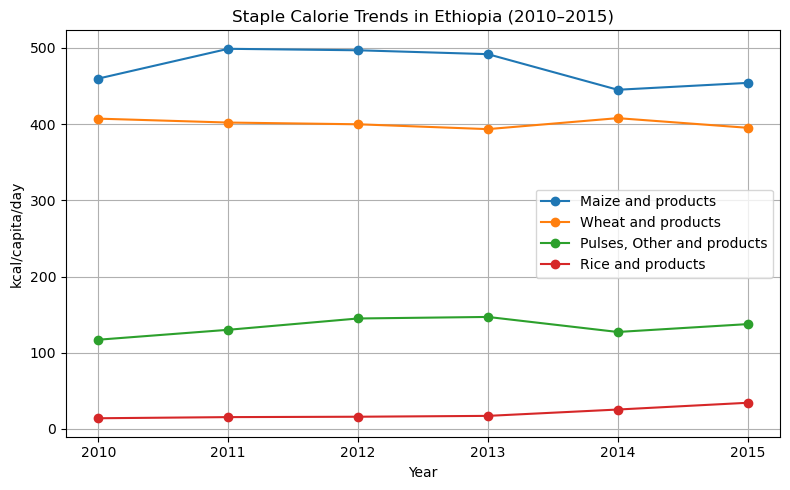

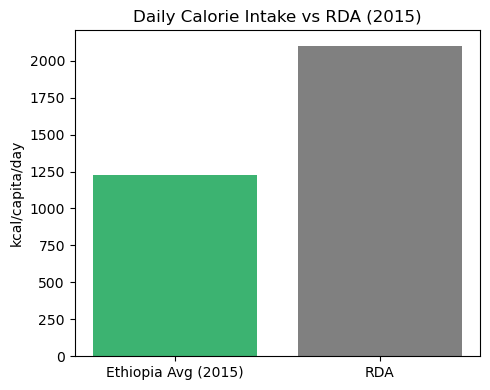

In [13]:
fbs_df = pd.read_csv("FAOSTAT_data_en_3-30-2025.csv")

target_elements = ["Food supply (kcal/capita/day)", "Food supply quantity (g/capita/day)"]
fbs_filtered = fbs_df[fbs_df["Element"].isin(target_elements)]

fbs_filtered = fbs_filtered[(fbs_filtered["Year"] >= 2010) & (fbs_filtered["Year"] <= 2015)]

pivot = fbs_filtered.pivot_table(index=["Year", "Item"],
                                 columns="Element",
                                 values="Value",
                                 aggfunc="mean").reset_index()

pivot = pivot.rename(columns={
    "Food supply (kcal/capita/day)": "kcal_per_capita_per_day",
    "Food supply quantity (g/capita/day)": "grams_per_capita_per_day"
})

main_staples = ["Maize and products", "Wheat and products", "Pulses, Other and products", "Rice and products"]
trend_data = pivot[pivot["Item"].isin(main_staples)]

plt.figure(figsize=(8, 5))
for item in main_staples:
    subset = trend_data[trend_data["Item"] == item]
    plt.plot(subset["Year"], subset["kcal_per_capita_per_day"], marker='o', label=item)

plt.title("Staple Calorie Trends in Ethiopia (2010–2015)")
plt.ylabel("kcal/capita/day")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

data_2015 = pivot[pivot["Year"] == 2015]

rda_kcal = 2100
total_kcal_2015 = data_2015["kcal_per_capita_per_day"].sum()

plt.figure(figsize=(5, 4))
plt.bar(["Ethiopia Avg (2015)", "RDA"], [total_kcal_2015, rda_kcal], color=["mediumseagreen", "gray"])
plt.title("Daily Calorie Intake vs RDA (2015)")
plt.ylabel("kcal/capita/day")
plt.tight_layout()
plt.show()